# Customer Churn Analysis

**Project:** Telco Customer Churn — EDA & baseline modeling  
**Author:** Nada Hmida 
**Date:** 08.12.2025

---

## 1. Setup & Imports
## 2. Load data
## 3. Data cleaning & preprocessing
## 4. Exploratory Data Analysis (EDA)
## 5. Visualizations (key churn plots)
## 7. Insights & Recommendations

In [16]:
#import necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#upload the dataset

In [22]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
print("dataset shape:", df.shape)
print("\nColumns:",df.columns.tolist())

dataset shape: (7043, 21)


In [28]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [30]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#TotalCharges stored as object but must be float

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors= "coerce")
df.dtypes

In [37]:
df["TotalCharges"].isna().sum()

np.int64(11)

In [39]:
df= df.dropna(subset = ["TotalCharges"])

In [40]:
df.shape

(7032, 21)

In [41]:
df.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


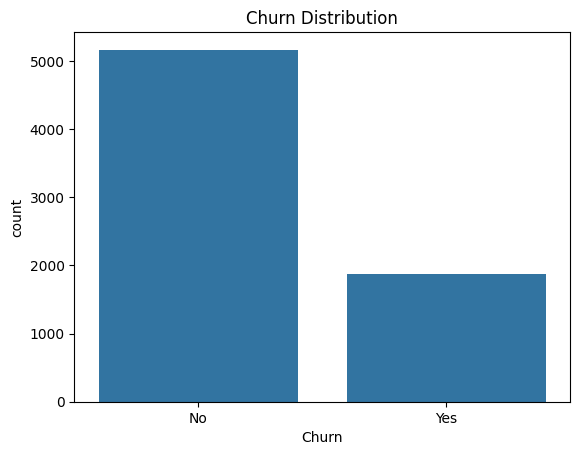

In [42]:
sns.countplot(data = df, x = "Churn")
plt.title("Churn Distribution")
plt.show()

The dataset shows that approximately 27% of customers churn.
This is a significant portion of the customer base, indicating a churn problem that needs attention.”

## Churn by Gender

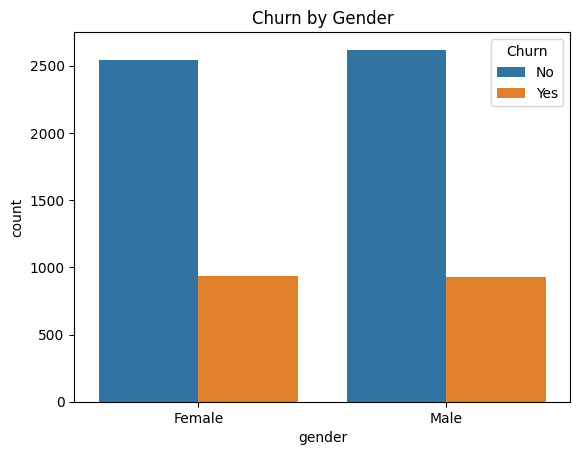

In [44]:
sns.countplot(data = df, x = "gender", hue= "Churn")
plt.title("Churn by Gender")
plt.show()

Gender does NOT influence churn.
Being male or female has no effect on whether a customer leaves the company.

## Churn by Senior Citizen Status

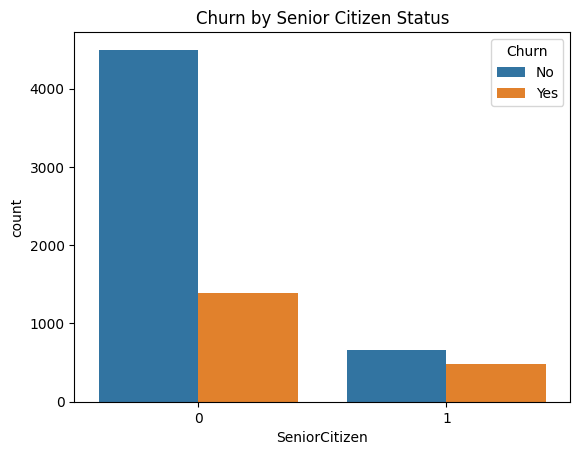

In [46]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Churn by Senior Citizen Status")
plt.show()


Senior customers are more likely to churn compared to younger customers.


## Churn by Contract Type

<function matplotlib.pyplot.show(close=None, block=None)>

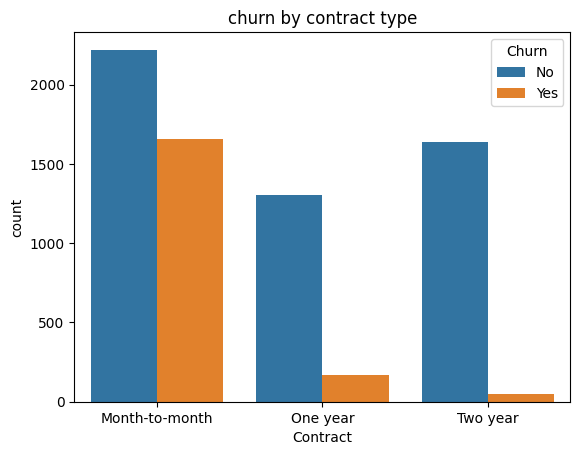

In [49]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("churn by contract type")
plt.show

Customers on Month-to-Month contracts churn dramatically more than One-year or Two-year contracts.
Recommendation: Offer incentives to switch them to 1-year or 2-year contracts.

## Churn by Monthly Charges

<function matplotlib.pyplot.show(close=None, block=None)>

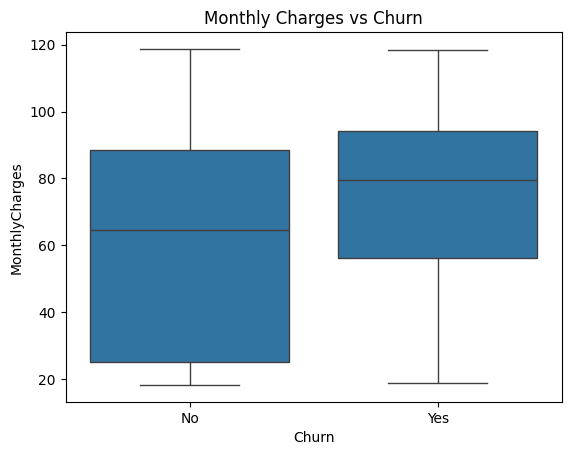

In [53]:
sns.boxplot(data = df,x= "Churn", y= "MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show


Month-to-month customers churn the most.
Higher monthly charges → higher churn.

## Churn Count by Internet Service Type

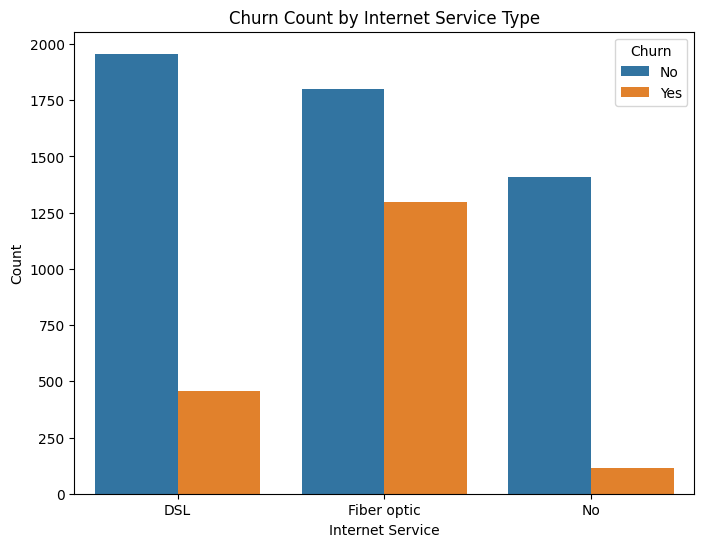

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x='InternetService',
    hue='Churn',
)

plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


## Churn Rate by Payment Method

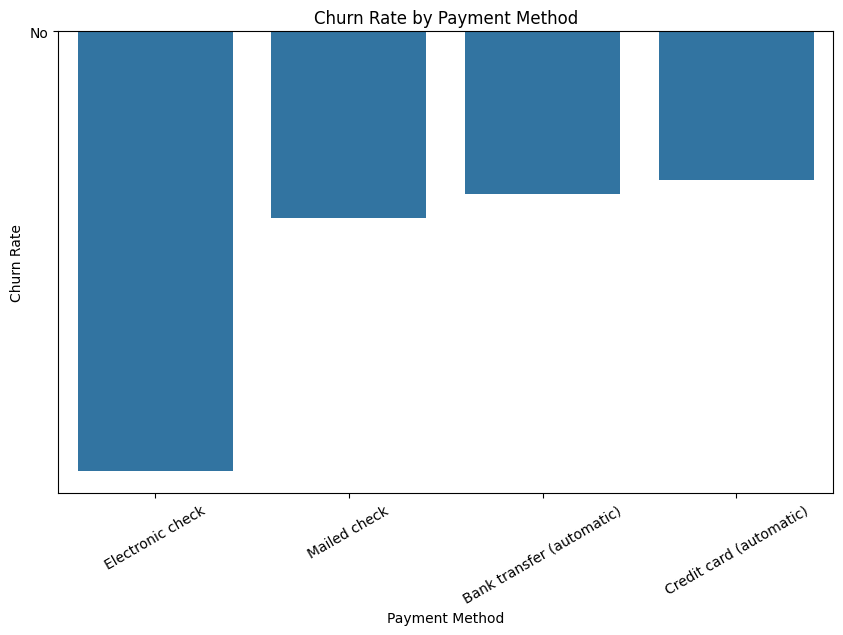

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='PaymentMethod',
    y='Churn',
    estimator='mean',
    errorbar=None
)

plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=30)
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.show()


High churn for electronic check users.
Recommendation: Encourage autopay options or digital payment discounts.


## Tenure Distribution by Churn

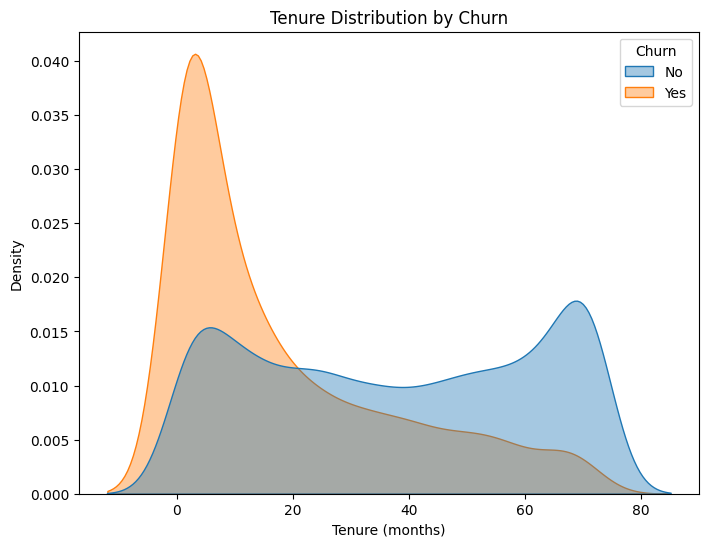

In [56]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x='tenure',
    hue='Churn',
    common_norm=False,
    fill=True,
    alpha=0.4
)

plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.show()


Insight: Customers with short tenure churn early.
The density curve for churners is heavily concentrated in tenure < 12 months.
Recommendation: Implement welcome programs or early engagement strategies.
